In [1]:
%load_ext autoreload
%autoreload 2
%cd /home/xux/Desktop/Enzyme_design/Savi_design/Savinase-engineering

/home/xux/Desktop/Enzyme_design/Savi_design/Savinase-engineering


# Round1 wet-lab data

In [2]:
import pandas as pd

data_path = 'data/round2/activity/data.csv'
df_act = pd.read_csv(data_path)

In [3]:
# Convert data into fasta formate
with open('data/round2/activity/data.csv.fasta', 'w') as f:
    for i, seq in enumerate(df_act['seq']):
        f.write(f'>seq_{i}\n{seq}\n')

# Process the prior data

In [4]:
def load_fasta_to_df(fasta_file):
    """load fasta file to dataframe
    """
    with open(fasta_file, 'r') as f:
        lines = f.readlines()
    seqs = []
    headers = []
    new_line = False
    for line in lines:
        if line[0] == '>':
            headers.append(line.strip())
            new_line = True
        else:
            if new_line:
                seqs.append(line.strip())
                new_line = False
            else:
                seqs[-1] += line.strip()
    df = pd.DataFrame({'name': headers, 'sequence': seqs})
    return df

In [5]:
fasta_file = 'data/round2/prior/target_seqs.fasta'

df_hmm_search = load_fasta_to_df(fasta_file)
df_hmm_search['length'] = [len(seq) for seq in df_hmm_search.sequence]
len(df_hmm_search)

223594

In [6]:
df_subtilisin_like = pd.read_csv('data/round2/prior/PF00082.25.fasta.csv')
display(df_subtilisin_like.columns)
len(df_subtilisin_like)

Index(['name', 'sequence', 'length'], dtype='object')

62667

In [7]:
df_prior = pd.concat([df_hmm_search, df_subtilisin_like])
df_prior_filt = df_prior[(df_prior.length<=478.0) & (df_prior.length>=127.0)]
len(df_prior_filt)

111862

In [8]:
# Split dataframe into train and test
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df_prior_filt, test_size=0.2, random_state=42)

df_train.to_csv('data/round2/prior/target_seqs_train.csv', index=False)
df_test.to_csv('data/round2/prior/target_seqs_test.csv', index=False)

len(df_train), len(df_test)

(89489, 22373)

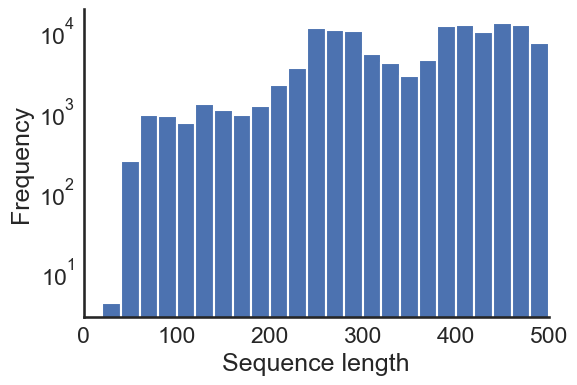

In [9]:
from utils import plot_style_utils
import os

plot_style_utils.set_pub_plot_context(context="talk")
fig, ax = plot_style_utils.simple_ax()
plot_style_utils.prettify_ax(ax)

min_x, max_x, binwidth = 0, 500, 20
bins=range(min_x, max_x + binwidth, binwidth)
ax.hist(df_prior.length, bins=bins)

ax.set_xlabel("Sequence length")
ax.set_ylabel("Frequency")
ax.set_xlim(0, 500)
ax.set_yscale('log')
os.makedirs('figures/round2/prior', exist_ok=True)
plot_style_utils.save_for_pub(fig, path='figures/round2/prior_length_hist')